# QUES10. Mini Project based on NLP Applications.

# Fake News Detection

The objective of a fake news detection NLP project is to develop a robust and reliable system capable of automatically identifying and classifying misinformation within textual content, thereby aiding in the mitigation of its harmful effects on society by promoting the dissemination of accurate and trustworthy information.

# IMPORTING LIBRARIES

In [1]:
print("ANIRUDH SHUKLA 00619011921 AIDS B1 A")

ANIRUDH SHUKLA 00619011921 AIDS B1 A


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

# DATA PREPARATION

1. The dataset consists of two CSV files. 
2. The first file named “True.csv” contains more than 12,600 articles from reuter.com. 
3. The second file named “Fake.csv” contains more than 12,600 articles from different fake news outlet resources. 
4. Each article contains the following information: article title, text, type and the date the article was published on. 
5. The data collected were cleaned and processed, however, the punctuations and mistakes that existed in the fake news were kept in the text.


In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

# DATA INFORMATION

In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [5]:
df_fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

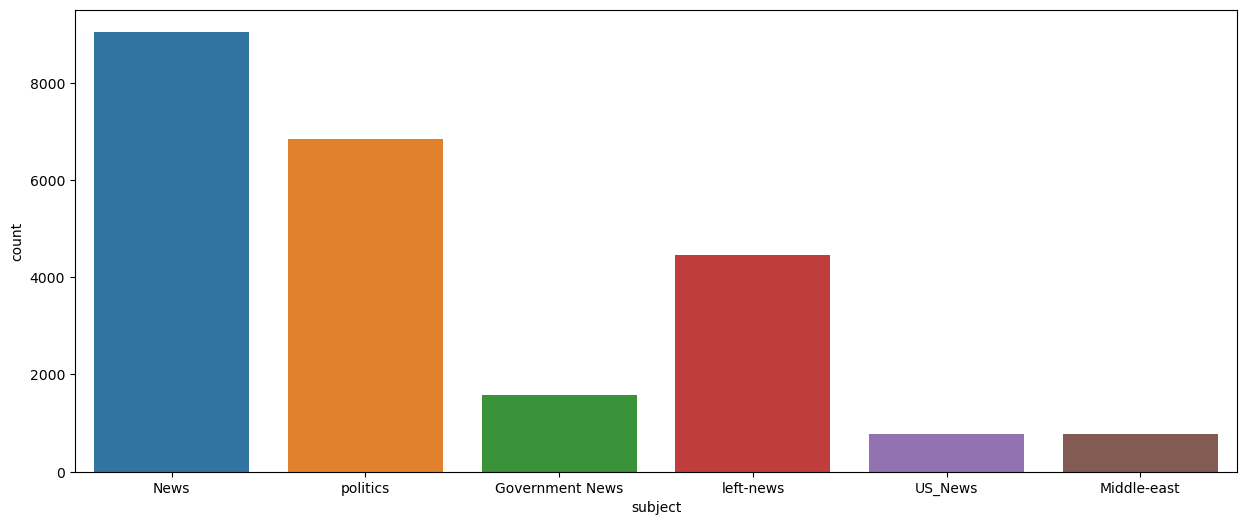

In [6]:
plt.figure(figsize=(15,6))
sns.countplot(x='subject',data=df_fake)

In [7]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
df_true.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [9]:
df_true['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

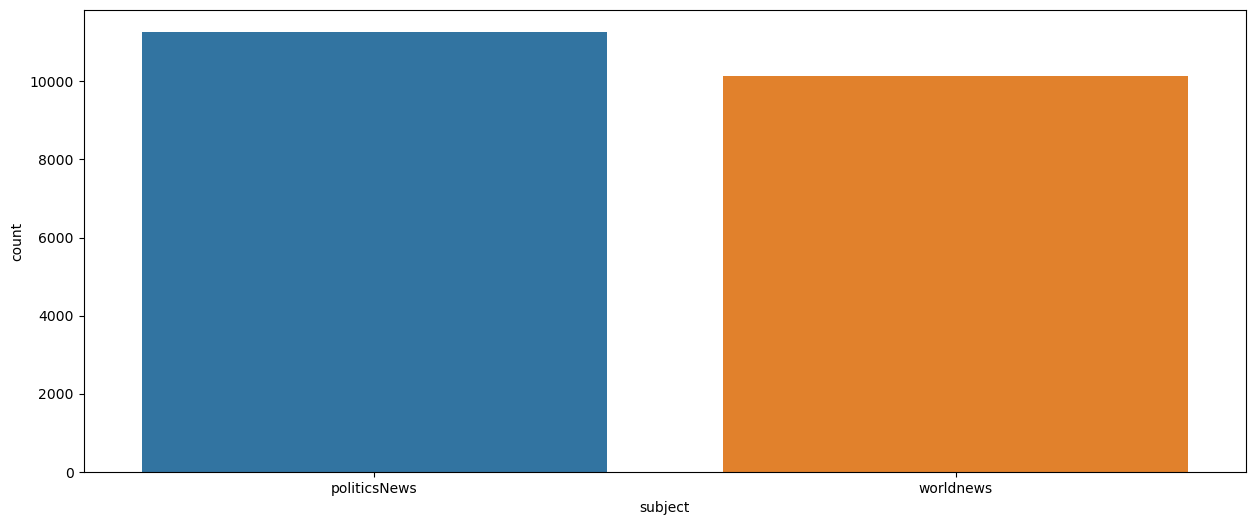

In [10]:
plt.figure(figsize=(15,6))
sns.countplot(x='subject',data=df_true)

In [11]:
df_fake["class"] = 0
df_true["class"] = 1

In [12]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [13]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [14]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [15]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

In [16]:
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [17]:
df_marge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [18]:
df = df_marge.drop(["title", "subject","date"], axis = 1)

In [19]:
df.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [20]:
df = df.sample(frac = 1)

In [21]:
df.head(10)

,text,class
21836,This story should send chills down the spine o...,0
20912,MEXICO CITY (Reuters) - Mexico and Central Ame...,1
18559,The outspoken comedian posed for a photo shoot...,0
7662,WASHINGTON (Reuters) - Most Republicans believ...,1
4669,Matt Lauer s performance as moderator of the I...,0
3502,WASHINGTON (Reuters) - Veterans Affairs Secret...,1
15432,KINSHASA (Reuters) - Democratic Republic of Co...,1
7331,NEW YORK (Thomson Reuters Foundation) - The el...,1
11211,"While Obama hangs out in Tahiti, his NSA direc...",0
21731,"Apparently, keeping a slave and repeatedly rap...",0


In [22]:
df.isnull().sum()

text     0
class    0
dtype: int64

# FLOWCHART

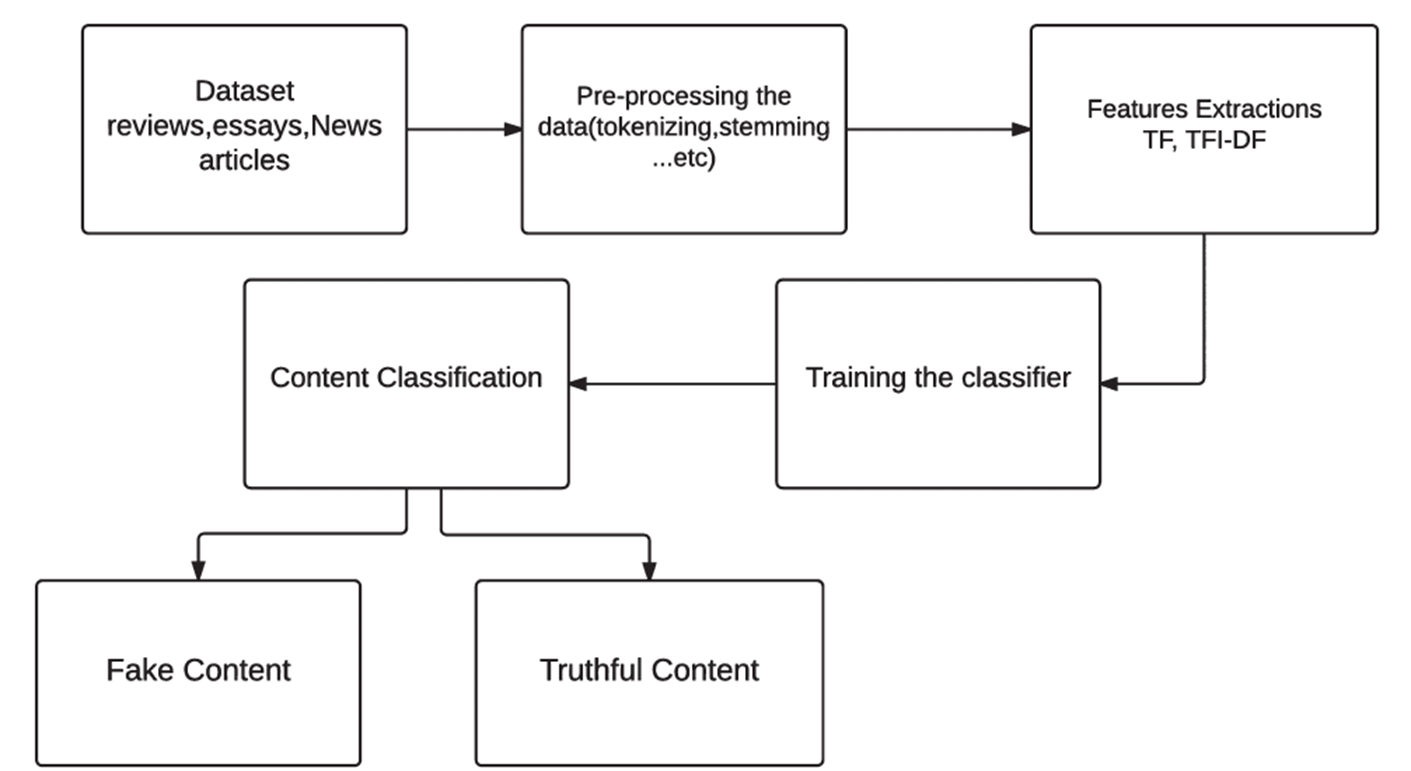

# DATA PREPROCESSING

In [23]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [24]:
df["text"] = df["text"].apply(word_drop)

In [25]:
df.head(10)

,text,class
21836,this story should send chills down the spine o...,0
20912,mexico city reuters mexico and central ame...,1
18559,the outspoken comedian posed for a photo shoot...,0
7662,washington reuters most republicans believ...,1
4669,matt lauer s performance as moderator of the i...,0
3502,washington reuters veterans affairs secret...,1
15432,kinshasa reuters democratic republic of co...,1
7331,new york thomson reuters foundation the el...,1
11211,while obama hangs out in tahiti his nsa direc...,0
21731,apparently keeping a slave and repeatedly rap...,0


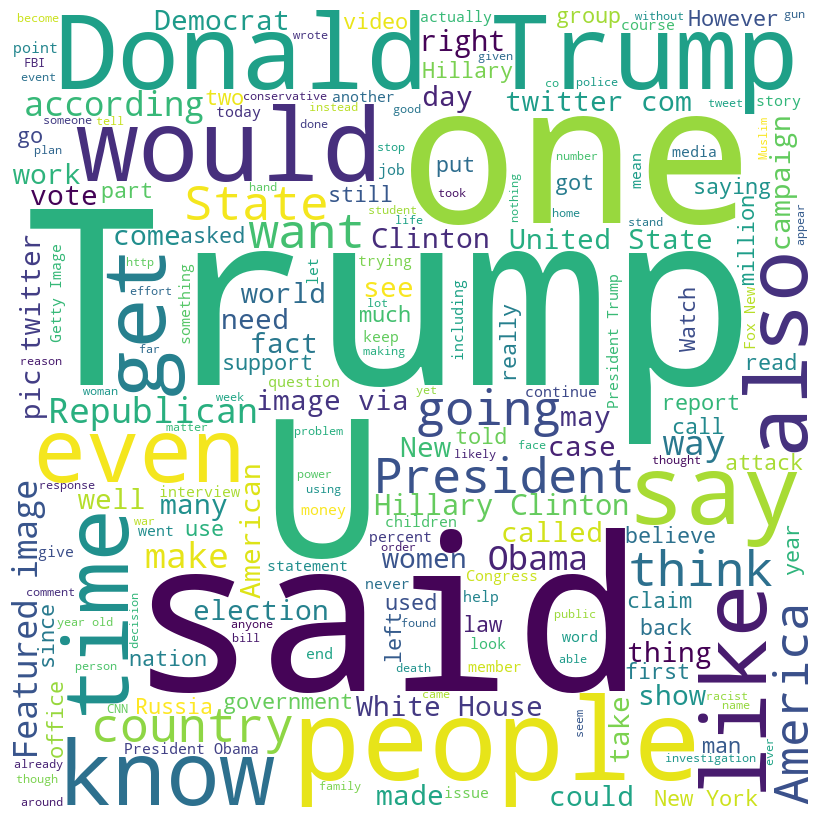

In [26]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(df_marge[df_marge['class'] == 0].text)) 
  
# plot fake news data                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

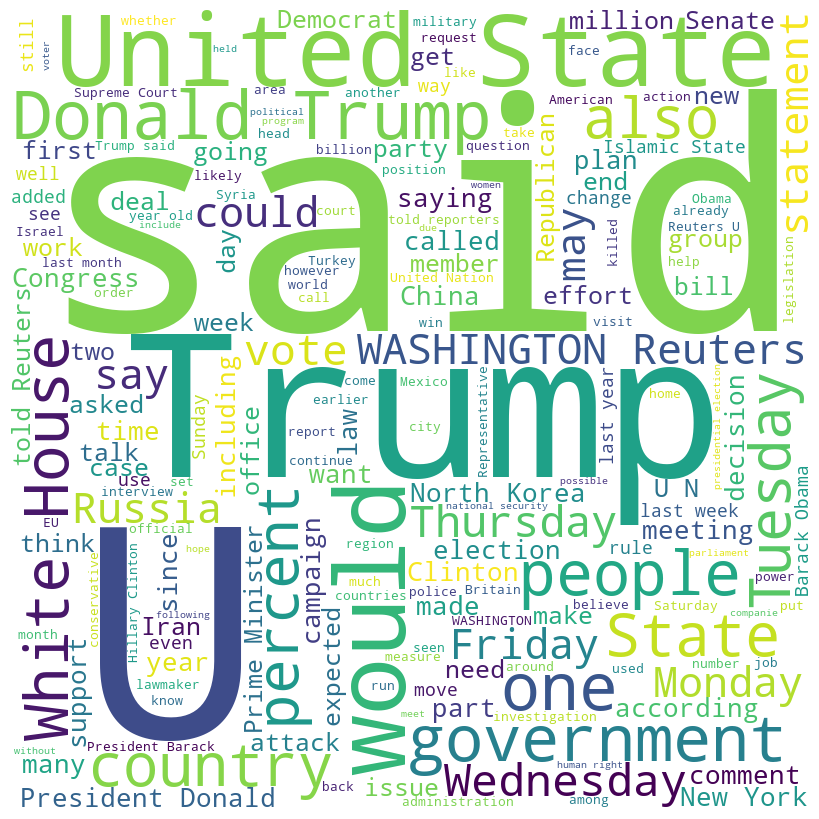

In [27]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(df_marge[df_marge['class'] == 1].text)) 
  
# plot fake news data                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [28]:
x = df["text"]
y = df["class"]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# TF-IDF Vecorization

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
#xv_tarin2=pd.DataFrame.sparse.from_spmatrix(xv_train)
xv_test = vectorization.transform(x_test)

print(xv_test.shape)
df.head()

#xv_tarin2.head()

(11220, 95178)


,text,class
21836,this story should send chills down the spine o...,0
20912,mexico city reuters mexico and central ame...,1
18559,the outspoken comedian posed for a photo shoot...,0
7662,washington reuters most republicans believ...,1
4669,matt lauer s performance as moderator of the i...,0


# LogisticRegression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [34]:
pred_lr=LR.predict(xv_test)

In [35]:
LR.score(xv_test, y_test)

0.9881461675579323

In [36]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5838
           1       0.99      0.99      0.99      5382

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



# DECISION TREE

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [39]:
pred_dt = DT.predict(xv_test)

In [40]:
DT.score(xv_test, y_test)

0.9950980392156863

In [41]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5838
           1       0.99      1.00      0.99      5382

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



# GRADIENT BOOSTING

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [44]:
pred_gbc = GBC.predict(xv_test)

In [45]:
GBC.score(xv_test, y_test)

0.9951871657754011

In [46]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5838
           1       0.99      1.00      0.99      5382

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



# RANDOM FOREST

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [49]:
pred_rfc = RFC.predict(xv_test)

In [50]:
RFC.score(xv_test, y_test)

0.9893939393939394

In [51]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5838
           1       0.99      0.99      0.99      5382

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



# MANUAL TESTING

In [52]:
import pickle
with open('tfidf_vec_fit.pickle', 'wb') as handle:
    pickle.dump(vectorization,handle)
# save the model to disk
filename = 'DT.sav'
pickle.dump(DT, open(filename, 'wb'))

In [53]:

 with open('tfidf_vec_fit.pickle', 'rb') as handle:
    tfidf_vec_fit_loaded = pickle.load(handle)
 
 with open('DT.sav', 'rb') as handle:
    spam_detect_model_loaded = pickle.load(handle)

In [54]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "True News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(word_drop) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [55]:
news = str(input())
manual_testing(news)

21st Century Wire says This week, the historic international Iranian Nuclear Deal was punctuated by a two-way prisoner swap between Washington and Tehran, but it didn t end quite the way everyone expected. On the Iranian side, one of the U.S. citizens who was detained in Iran, Nosratollah Khosravi-Roodsari, has stayed in Iran, but on the U.S. side   all 7 of the Iranians held in U.S. prisons DID NOT show up to their flight to Geneva for the prisoner exchange   with at least 3 electing to stay in the U.S  TEHRAN SIDE: In Iran, 5 U.S. prisoners were released, with 4 of them making their way to Germany via Switzerland.Will Robinson Daily MailNone of the Iranians freed in the prisoner swap have returned home and could still be in the United States, it has been reported.The seven former inmates, who were released as part of a deal with the Islamic republic, did not show up to get a flight to Geneva, Switzerland, where the exchange was set to take place on Sunday.Three of the Iranians have d

# VISUALING THE TECHNIQUES WHICH ONE IS BETTER 

In [62]:
print("Random Forest Prediction Score : ",RFC.score(xv_test, y_test))
print("Decision Tree Prediction Score : ",DT.score(xv_test, y_test))
print("Gradient Boosting Prediction Score : ",GBC.score(xv_test, y_test))
print("Logistic Regression Prediction Score : ",LR.score(xv_test, y_test))

Random Forest Prediction Score :  0.9893939393939394
Decision Tree Prediction Score :  0.9950980392156863
Gradient Boosting Prediction Score :  0.9951871657754011
Logistic Regression Prediction Score :  0.9881461675579323


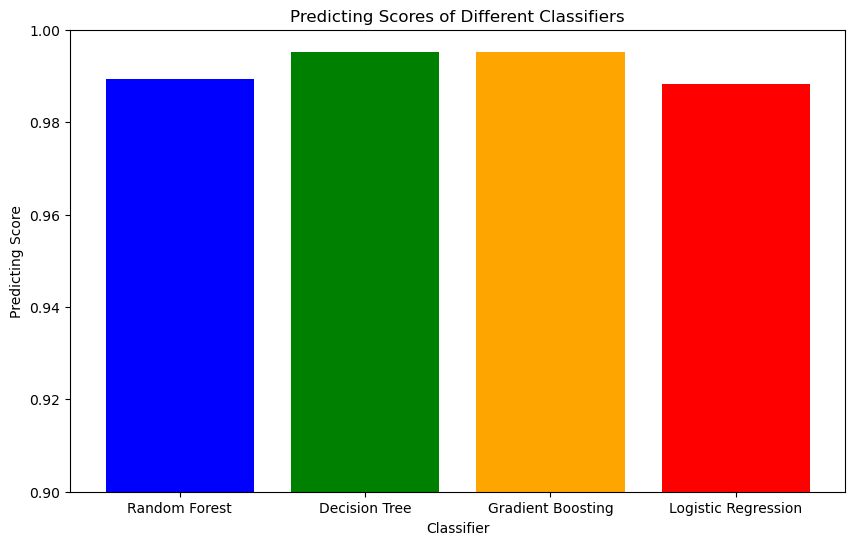

In [61]:
classifier_scores = {
    "Random Forest": RFC.score(xv_test, y_test),
    "Decision Tree": DT.score(xv_test, y_test),
    "Gradient Boosting": GBC.score(xv_test, y_test),
    "Logistic Regression": LR.score(xv_test, y_test)
}

plt.figure(figsize=(10, 6))
plt.bar(classifier_scores.keys(), classifier_scores.values(), color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Classifier')
plt.ylabel('Predicting Score')
plt.title('Predicting Scores of Different Classifiers')
plt.ylim(0.9, 1.0)
plt.show()